In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline
from pptx import Presentation 
from pptx.util import Inches 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import TSNE
from colour import Color
import matplotlib as mpl
import scipy, random
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from pandas.api.types import CategoricalDtype

In [ ]:
##data upload 

In [3]:
path = ('RESULTS_Live_MS2023_GSD1A') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


In [4]:
df = pd.read_csv(r'gsd1a_live_final_analysis/3df_cor_feat_GSD1A_final.csv')
df

,Unnamed: 0,group,group_with_id,group_with_pc,group_id_pc,Local Outlier Factor 10,Local Outlier Factor 8,Local Outlier Factor 30,calc_area1,calc_area2,...,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2,group.1,group_with_id.1,group_with_pc.1,PC
0,0,HCNONE,38HCNONE,HCNONE24,38HCNONE24,-1.433897,-1.455306,-1.252086,0.143463,0.419472,...,0.557721,1181.801276,1.212778,879.702131,0.174941,1.089426,HCNONE,38HCNONE,HCNONE24,24
1,4,HCNONE,38HCNONE,HCNONE24,38HCNONE24,-1.445472,-1.490976,-1.159764,0.130332,0.449435,...,0.506470,1232.554663,1.179912,704.175559,0.161335,0.701859,HCNONE,38HCNONE,HCNONE24,24
2,8,HCNONE,38HCNONE,HCNONE24,38HCNONE24,-1.031275,-1.069823,-1.037890,0.131028,0.404269,...,0.704236,923.873851,1.139629,491.547017,0.147697,0.509972,HCNONE,38HCNONE,HCNONE24,24
3,12,HCNONE,7522HCNONE,HCNONE24,7522HCNONE24,-1.172485,-1.184696,-1.121543,0.136008,0.415032,...,0.347876,1409.892524,1.166987,715.014028,0.176792,0.977730,HCNONE,7522HCNONE,HCNONE24,24
4,16,HCNONE,7522HCNONE,HCNONE24,7522HCNONE24,-0.982368,-0.960743,-1.067860,0.139134,0.417736,...,0.420654,1208.465321,1.168493,490.481396,0.154212,0.652700,HCNONE,7522HCNONE,HCNONE24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,1575,HCNONE,38HCNONE,HCNONE72,38HCNONE72,-1.099561,-1.127312,-1.103433,0.099491,0.403912,...,0.705036,370.117841,1.471057,189.210805,0.103786,0.480749,HCNONE,38HCNONE,HCNONE72,72
480,1579,HCNONE,38HCNONE,HCNONE72,38HCNONE72,-1.092848,-1.056782,-1.111679,0.110111,0.351612,...,0.730700,98.030153,1.449867,127.902142,0.073982,0.307872,HCNONE,38HCNONE,HCNONE72,72
481,1581,HCNONE,38HCNONE,HCNONE72,38HCNONE72,-1.140636,-1.129033,-1.135917,0.136724,0.328393,...,0.669733,40.074030,1.205055,179.797622,0.057534,0.250505,HCNONE,38HCNONE,HCNONE72,72
482,1585,GSD1ANONE,301GSD1ANONE,GSD1ANONE72,301GSD1ANONE72,-0.986267,-1.007048,-0.964407,0.106937,0.299325,...,0.729208,282.346234,1.508803,156.591594,0.096753,0.440704,GSD1ANONE,301GSD1ANONE,GSD1ANONE72,72


In [ ]:
## data clean-up

In [5]:
df = df.replace({'HCNONE72': 'HC72', 'GSD1ANONE72': 'GSD1A72', 
                'HCNONE48':'HC48', 'GSD1ANONE48': 'GSD1A48', 
                'HCNONE24' : 'HC24', 'GSD1ANONE24': 'GSD1A24', 
                'HCNONE': 'HC', 'GSD1ANONE': 'GSD1A'})

In [6]:
CLEAN_SCAT_HEAT_DATA = df.drop(columns=['Unnamed: 0', 'Local Outlier Factor 8', 'Local Outlier Factor 30',
                                        'Local Outlier Factor 10', 'group.1', 'group_with_id.1', 'group_with_pc.1'])
CLEAN_SCAT_HEAT_DATA

,group,group_with_id,group_with_pc,group_id_pc,calc_area1,calc_area2,calc_area3,calc_area4,calc_text1,calc_intensity,...,lyso_text2,lyso_text1,lyso_intensity1,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2,PC
0,HC,38HCNONE,HC24,38HCNONE24,0.143463,0.419472,0.311976,159.164687,0.007850,4649.439681,...,0.058034,0.157494,457.053538,0.557721,1181.801276,1.212778,879.702131,0.174941,1.089426,24
1,HC,38HCNONE,HC24,38HCNONE24,0.130332,0.449435,0.281299,149.191303,0.006570,5201.870786,...,0.057152,0.155865,317.570728,0.506470,1232.554663,1.179912,704.175559,0.161335,0.701859,24
2,HC,38HCNONE,HC24,38HCNONE24,0.131028,0.404269,0.300747,153.779162,0.005791,5325.267974,...,0.057675,0.150080,308.614320,0.704236,923.873851,1.139629,491.547017,0.147697,0.509972,24
3,HC,7522HCNONE,HC24,7522HCNONE24,0.136008,0.415032,0.282172,173.827711,0.006624,4784.143165,...,0.059101,0.167512,342.237295,0.347876,1409.892524,1.166987,715.014028,0.176792,0.977730,24
4,HC,7522HCNONE,HC24,7522HCNONE24,0.139134,0.417736,0.266726,170.618758,0.006558,4837.728661,...,0.059253,0.167382,365.150037,0.420654,1208.465321,1.168493,490.481396,0.154212,0.652700,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,HC,38HCNONE,HC72,38HCNONE72,0.099491,0.403912,0.358265,149.563140,0.007322,1691.987113,...,0.053885,0.120695,57.182230,0.705036,370.117841,1.471057,189.210805,0.103786,0.480749,72
480,HC,38HCNONE,HC72,38HCNONE72,0.110111,0.351612,0.396192,167.820312,0.007592,1473.842922,...,0.053413,0.126000,84.932843,0.730700,98.030153,1.449867,127.902142,0.073982,0.307872,72
481,HC,38HCNONE,HC72,38HCNONE72,0.136724,0.328393,0.427180,175.693838,0.007748,1346.618631,...,0.051400,0.133334,103.090795,0.669733,40.074030,1.205055,179.797622,0.057534,0.250505,72
482,GSD1A,301GSD1ANONE,GSD1A72,301GSD1ANONE72,0.106937,0.299325,0.336090,170.142245,0.009219,846.035430,...,0.049771,0.128121,120.507872,0.729208,282.346234,1.508803,156.591594,0.096753,0.440704,72


In [8]:
CLEAN_SCAT_HEAT_DATA_f = CLEAN_SCAT_HEAT_DATA.copy()
CLEAN_SCAT_HEAT_DATA_f.set_index(["group"], inplace = True,
                            append = True, drop = False)
CLEAN_SCAT_HEAT_DATA_f

,,group,group_with_id,group_with_pc,group_id_pc,calc_area1,calc_area2,calc_area3,calc_area4,calc_text1,calc_intensity,...,lyso_text2,lyso_text1,lyso_intensity1,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2,PC
,group,,,,,,,,,,,,,,,,,,,,,
0,HC,HC,38HCNONE,HC24,38HCNONE24,0.143463,0.419472,0.311976,159.164687,0.007850,4649.439681,...,0.058034,0.157494,457.053538,0.557721,1181.801276,1.212778,879.702131,0.174941,1.089426,24
1,HC,HC,38HCNONE,HC24,38HCNONE24,0.130332,0.449435,0.281299,149.191303,0.006570,5201.870786,...,0.057152,0.155865,317.570728,0.506470,1232.554663,1.179912,704.175559,0.161335,0.701859,24
2,HC,HC,38HCNONE,HC24,38HCNONE24,0.131028,0.404269,0.300747,153.779162,0.005791,5325.267974,...,0.057675,0.150080,308.614320,0.704236,923.873851,1.139629,491.547017,0.147697,0.509972,24
3,HC,HC,7522HCNONE,HC24,7522HCNONE24,0.136008,0.415032,0.282172,173.827711,0.006624,4784.143165,...,0.059101,0.167512,342.237295,0.347876,1409.892524,1.166987,715.014028,0.176792,0.977730,24
4,HC,HC,7522HCNONE,HC24,7522HCNONE24,0.139134,0.417736,0.266726,170.618758,0.006558,4837.728661,...,0.059253,0.167382,365.150037,0.420654,1208.465321,1.168493,490.481396,0.154212,0.652700,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,HC,HC,38HCNONE,HC72,38HCNONE72,0.099491,0.403912,0.358265,149.563140,0.007322,1691.987113,...,0.053885,0.120695,57.182230,0.705036,370.117841,1.471057,189.210805,0.103786,0.480749,72
480,HC,HC,38HCNONE,HC72,38HCNONE72,0.110111,0.351612,0.396192,167.820312,0.007592,1473.842922,...,0.053413,0.126000,84.932843,0.730700,98.030153,1.449867,127.902142,0.073982,0.307872,72
481,HC,HC,38HCNONE,HC72,38HCNONE72,0.136724,0.328393,0.427180,175.693838,0.007748,1346.618631,...,0.051400,0.133334,103.090795,0.669733,40.074030,1.205055,179.797622,0.057534,0.250505,72


In [ ]:
##scatter vis

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_7504\3627173173.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.lineplot(x='group', y='tmre_text1', hue='PC', data=CLEAN_SCAT_HEAT_DATA_f, palette= c_l,


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

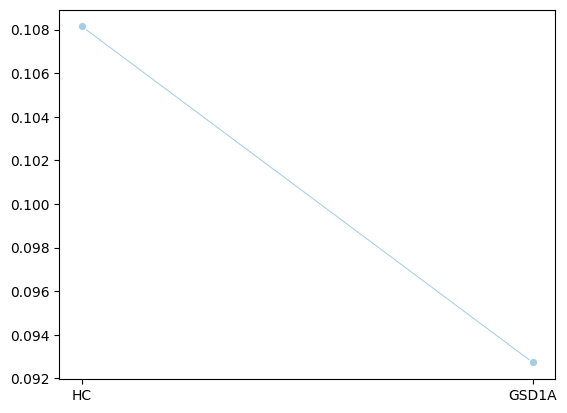

In [9]:
c_l = sns.color_palette("Paired", 3)
sns.lineplot(x='group', y='tmre_text1', hue='PC', data=CLEAN_SCAT_HEAT_DATA_f, palette= c_l,
            style='PC', size='PC', ci=90, markers=True, err_style="band")
plt.legend(title='CONDITION', fontsize=12)
# plt.xlabel('samples', fontsize=16);
# plt.ylabel('normalized to hc', fontsize=16);
# plt.title('Tmre texture Scatter ', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=10)
#size_order=["HDDMSO", "HDmdivi1 25uM"]
#modify individual font size of elements
# plt.legend(title='PLATE CONDITION', fontsize=10)
# plt.xlabel('samples', fontsize=16);
# plt.ylabel('intensity', fontsize=16);
# plt.title('Tmrearea Scatter ', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=10
plt.savefig(path + '\\' + 'tmre_line-plot.pdf', dpi=600) 

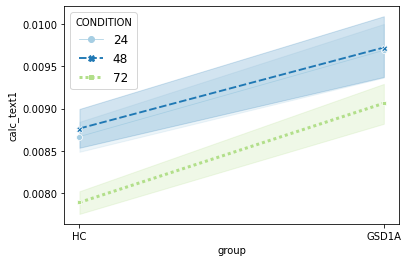

In [16]:
sns.lineplot(x='group', y='calc_text1', hue='PC', data=CLEAN_SCAT_HEAT_DATA_f, palette = c_l,
            style='PC', size='PC', ci=90, markers=True, err_style="band")
plt.legend(title='CONDITION', fontsize=12)
# plt.xlabel('samples', fontsize=16);
# plt.ylabel('normalized to hc', fontsize=16);
# plt.title('Calcein texture Scatter ', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=10)
#size_order=["HDDMSO", "HDmdivi1 25uM"]
#modify individual font size of elements
# plt.legend(title='PLATE CONDITION', fontsize=10)
# plt.xlabel('samples', fontsize=16);
# plt.ylabel('intensity', fontsize=16);
# plt.title('Tmrearea Scatter ', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=10
plt.savefig(path + '\\' + 'calcein_line-plot.pdf', dpi=600) 

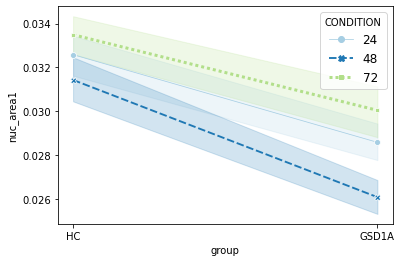

In [22]:
c_l = sns.color_palette("Paired", 3)
sns.lineplot(x='group', y='nuc_area1', hue='PC', data=CLEAN_SCAT_HEAT_DATA_f,palette= c_l,
size='PC', ci=90, markers=True, err_style="band", style='PC'
            )

plt.legend(title='CONDITION', fontsize=12)
#plt.xlabel('samples', fontsize=16);
#plt.ylabel('normalized to hc', fontsize=16);
#plt.title('Dapi area Scatter ', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=10)
#size_order=["HDDMSO", "HDmdivi1 25uM"]
#modify individual font size of elements
# plt.legend(title='PLATE CONDITION', fontsize=10)
# plt.xlabel('samples', fontsize=16);
# plt.ylabel('intensity', fontsize=16);
# plt.title('Tmrearea Scatter ', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=10
plt.savefig(path + '\\' + 'Nuc_line-plot.pdf', dpi=600) 

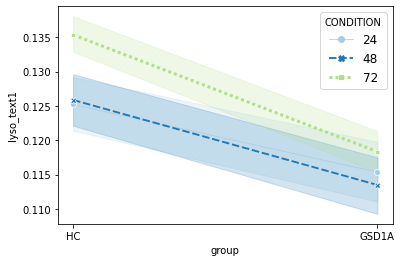

In [18]:
sns.lineplot(x='group', y='lyso_text1', hue='PC', data=CLEAN_SCAT_HEAT_DATA_f, palette=c_l,
            style='PC', size='PC', ci=90, markers=True, err_style="band")
plt.legend(title='CONDITION', fontsize=12)
# plt.xlabel('samples', fontsize=16);
# plt.ylabel('normalized to hc', fontsize=16);
# plt.title('Lysotracker texture Scatter ', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=10)
#size_order=["HDDMSO", "HDmdivi1 25uM"]
#modify individual font size of elements
# plt.legend(title='PLATE CONDITION', fontsize=10)
# plt.xlabel('samples', fontsize=16);
# plt.ylabel('intensity', fontsize=16);
# plt.title('Tmrearea Scatter ', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=10
plt.savefig(path + '\\' + 'Lyso_line-plot.pdf', dpi=600) 

In [23]:
CLEAN_SCAT_HEAT_DATA_f

,,group,group_with_id,group_with_pc,group_id_pc,calc_area1,calc_area2,calc_area3,calc_area4,calc_text1,calc_intensity,...,lyso_text2,lyso_text1,lyso_intensity1,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2,PC
,group,,,,,,,,,,,,,,,,,,,,,
0,HC,HC,38HCNONE,HC24,38HCNONE24,0.143463,0.419472,0.311976,159.164687,0.007850,4649.439681,...,0.058034,0.157494,457.053538,0.557721,1181.801276,1.212778,879.702131,0.174941,1.089426,24
1,HC,HC,38HCNONE,HC24,38HCNONE24,0.130332,0.449435,0.281299,149.191303,0.006570,5201.870786,...,0.057152,0.155865,317.570728,0.506470,1232.554663,1.179912,704.175559,0.161335,0.701859,24
2,HC,HC,38HCNONE,HC24,38HCNONE24,0.131028,0.404269,0.300747,153.779162,0.005791,5325.267974,...,0.057675,0.150080,308.614320,0.704236,923.873851,1.139629,491.547017,0.147697,0.509972,24
3,HC,HC,7522HCNONE,HC24,7522HCNONE24,0.136008,0.415032,0.282172,173.827711,0.006624,4784.143165,...,0.059101,0.167512,342.237295,0.347876,1409.892524,1.166987,715.014028,0.176792,0.977730,24
4,HC,HC,7522HCNONE,HC24,7522HCNONE24,0.139134,0.417736,0.266726,170.618758,0.006558,4837.728661,...,0.059253,0.167382,365.150037,0.420654,1208.465321,1.168493,490.481396,0.154212,0.652700,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,HC,HC,38HCNONE,HC72,38HCNONE72,0.099491,0.403912,0.358265,149.563140,0.007322,1691.987113,...,0.053885,0.120695,57.182230,0.705036,370.117841,1.471057,189.210805,0.103786,0.480749,72
480,HC,HC,38HCNONE,HC72,38HCNONE72,0.110111,0.351612,0.396192,167.820312,0.007592,1473.842922,...,0.053413,0.126000,84.932843,0.730700,98.030153,1.449867,127.902142,0.073982,0.307872,72
481,HC,HC,38HCNONE,HC72,38HCNONE72,0.136724,0.328393,0.427180,175.693838,0.007748,1346.618631,...,0.051400,0.133334,103.090795,0.669733,40.074030,1.205055,179.797622,0.057534,0.250505,72


In [ ]:
##heatmap vis

In [24]:
CLEAN_dfheatmapREAL = CLEAN_SCAT_HEAT_DATA_f.copy()
CLEAN_dfheatmapREAL.set_index(["group_with_pc"], inplace = True,
                            append = True, drop = False)
CLEAN_dfheatmapREAL

,,,group,group_with_id,group_with_pc,group_id_pc,calc_area1,calc_area2,calc_area3,calc_area4,calc_text1,calc_intensity,...,lyso_text2,lyso_text1,lyso_intensity1,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2,PC
,group,group_with_pc,,,,,,,,,,,,,,,,,,,,,
0,HC,HC24,HC,38HCNONE,HC24,38HCNONE24,0.143463,0.419472,0.311976,159.164687,0.007850,4649.439681,...,0.058034,0.157494,457.053538,0.557721,1181.801276,1.212778,879.702131,0.174941,1.089426,24
1,HC,HC24,HC,38HCNONE,HC24,38HCNONE24,0.130332,0.449435,0.281299,149.191303,0.006570,5201.870786,...,0.057152,0.155865,317.570728,0.506470,1232.554663,1.179912,704.175559,0.161335,0.701859,24
2,HC,HC24,HC,38HCNONE,HC24,38HCNONE24,0.131028,0.404269,0.300747,153.779162,0.005791,5325.267974,...,0.057675,0.150080,308.614320,0.704236,923.873851,1.139629,491.547017,0.147697,0.509972,24
3,HC,HC24,HC,7522HCNONE,HC24,7522HCNONE24,0.136008,0.415032,0.282172,173.827711,0.006624,4784.143165,...,0.059101,0.167512,342.237295,0.347876,1409.892524,1.166987,715.014028,0.176792,0.977730,24
4,HC,HC24,HC,7522HCNONE,HC24,7522HCNONE24,0.139134,0.417736,0.266726,170.618758,0.006558,4837.728661,...,0.059253,0.167382,365.150037,0.420654,1208.465321,1.168493,490.481396,0.154212,0.652700,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,HC,HC72,HC,38HCNONE,HC72,38HCNONE72,0.099491,0.403912,0.358265,149.563140,0.007322,1691.987113,...,0.053885,0.120695,57.182230,0.705036,370.117841,1.471057,189.210805,0.103786,0.480749,72
480,HC,HC72,HC,38HCNONE,HC72,38HCNONE72,0.110111,0.351612,0.396192,167.820312,0.007592,1473.842922,...,0.053413,0.126000,84.932843,0.730700,98.030153,1.449867,127.902142,0.073982,0.307872,72
481,HC,HC72,HC,38HCNONE,HC72,38HCNONE72,0.136724,0.328393,0.427180,175.693838,0.007748,1346.618631,...,0.051400,0.133334,103.090795,0.669733,40.074030,1.205055,179.797622,0.057534,0.250505,72


In [25]:
CLEAN_dfheatmapREAL = CLEAN_dfheatmapREAL.groupby(level=2).mean()
CLEAN_dfheatmap_final = CLEAN_dfheatmapREAL.drop(columns=['PC'])
# CLEAN_dfheatmap_final = CLEAN_dfheatmap_final.reindex(columns=['LysointensityMean', 'LysointensitySum', 'LysoTSarea', 'LysoSpots-RSI', 'LysoSpots-CSI', 'LysoSpots-USPI', 
#                                                               'LysoSpots-SC', 'LysoSpots-SBI', 'LysoSpots-SAPX', 'LysoSpots-RI', 'LysoSpots-STRI', 'LysoSpots-SAUM', 'LysoSpots-SR',
#                                                               'LysoIArea-UM', 'LysoIArea-R', 'TmreIntensityMean', 'TmreIntensitySum', 'TmreTSarea', 'TmreSpots-RSI', 'TmreSpots-CSI', 'TmreSpots-USPI', 'TmreSpots-SC', 'TmreSpots-SBI', 'TmreSpots-SAPX',
#                                                               'TmreSpots-RI', 'TmreSpots-STRI', 'TmreSpots-SAUM', 'TmreSpots-SR', 'TmreIArea-UM', 'TmreIArea-R', 'Calceinarea', 'CalceinR', 'CalceinIntensityMean', 'Nucarea', 'NucR', 'NucIntensityMean'])
CLEAN_dfheatmap_final.fillna(0, inplace=True)
CLEAN_dfheatmap_final_NORMAL = CLEAN_dfheatmap_final.copy()
CLEAN_dfheatmap_final_NORMAL=(CLEAN_dfheatmap_final_NORMAL-CLEAN_dfheatmap_final_NORMAL.mean())/CLEAN_dfheatmap_final_NORMAL.std()
CLEAN_dfheatmap_final_NORMAL

,calc_area1,calc_area2,calc_area3,calc_area4,calc_text1,calc_intensity,nuc_area1,nuc_area2,nuc_area3,nuc_area4,...,lyso_area3,lyso_text2,lyso_text1,lyso_intensity1,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2
group_with_pc,,,,,,,,,,,,,,,,,,,,,
GSD1A24,0.817274,0.397224,-1.221845,-1.211330,1.045342,-0.865293,-0.652431,-0.866470,-0.759154,-0.590023,...,-0.005050,-1.375024,-0.846922,-0.488290,-1.012764,-1.299751,1.180192,-0.917717,-1.514631,-1.661092
GSD1A48,1.202641,-0.843483,-0.814073,0.251707,1.093352,-0.275326,-1.566266,-0.538357,-1.282070,-0.263367,...,0.373061,0.531876,-1.075217,-0.461309,-0.728750,-0.299531,0.578092,0.720807,-0.416263,0.623613
GSD1A72,-0.260096,-1.381796,0.384007,-0.476680,0.139889,-1.380706,-0.118809,-1.231116,0.206066,0.636983,...,1.610220,0.129800,-0.482166,-1.510905,-0.022987,-0.758989,-0.541283,-1.358718,-0.324882,-0.247367
HC24,-0.368589,1.320738,-0.392445,-0.671979,-0.430576,1.088436,0.808943,1.032750,-0.073731,-1.345992,...,-1.007091,-0.865801,0.360214,0.726995,-0.365203,0.084916,0.415133,0.376736,0.201361,-0.321626
HC48,0.230250,-0.163688,0.546149,1.587113,-0.291819,0.886500,0.387194,1.016153,0.279852,0.024719,...,-1.110951,0.151961,0.440995,1.209453,0.343217,0.972991,0.042917,1.280566,0.655581,1.248697
HC72,-1.621479,0.671005,1.498207,0.521169,-1.556188,0.546389,1.141368,0.587041,1.629038,1.537679,...,0.139811,1.427188,1.603096,0.524056,1.786486,1.300363,-1.675050,-0.101673,1.398834,0.357775


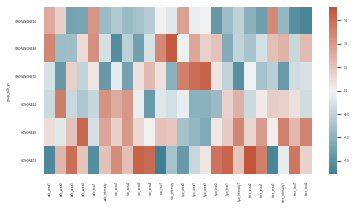

In [42]:
col = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(CLEAN_dfheatmap_final_NORMAL, cmap=col)
#YlGnBu, Blues. BuPu, Greens) cmap='BuPu'
sns.set_style("white")
SMALL_SIZE = 3
MEDIUM_SIZE = 5
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
cax = plt.gcf().axes[0]
cax.tick_params(labelsize=3)
plt.yticks(rotation="horizontal")
plt.xticks(rotation="vertical")
plt.margins(0.1)
plt.subplots_adjust(bottom=0.3)
plt.savefig(path + '\\' + 'HEATMAP1.png', dpi=300)
plt.show() 

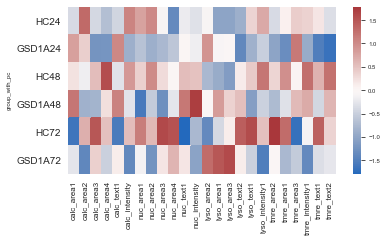

In [65]:
#antoher represantion with different index 
index_list = CLEAN_dfheatmap_final_NORMAL.index.values
hc_list = [index for index in index_list if "HC" == index[:2]]
ds_list = [index for index in index_list if "HC" != index[:2]]
#     hc_list
new_list = []
max_len = min(len(hc_list),len(ds_list))
for i in range(max_len*2):
    new_list.append(hc_list[int(i/2)] if i%2==0 else ds_list[int((i-1)/2)])
    if len(hc_list)>max_len:
        new_list += hc_list[max_len:]
    if len(ds_list)>max_len:
        new_list += ds_list[max_len:]  
#     print(new_list)        
lan = plt.rcParams['font.family'] = ['Arial']
CLEAN_dfheatmap_final_NORMALv2 = CLEAN_dfheatmap_final_NORMAL.reindex(new_list)
col = sns.diverging_palette(220, 20, as_cmap=True)
col = sns.diverging_palette(145, 300, s=60, as_cmap=True)
col = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(CLEAN_dfheatmap_final_NORMALv2, cmap=col)
#YlGnBu, Blues. BuPu, Greens)
sns.set_style("white")
# SMALL_SIZE = 3
# MEDIUM_SIZE = 6
# BIGGER_SIZE = 12
# plt.rc('font', family=lan)
# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
font = {'family' : 'Arial',
        'size'   : 22}

plt.rc('font', **font)
cax = plt.gcf().axes[0]
cax.tick_params(labelsize=6)
plt.yticks(family = 'Arial', rotation="horizontal", size = 10)
plt.xticks(family = 'Arial', rotation="vertical", size= 8 )
plt.margins(0.1)
plt.subplots_adjust(bottom=0.3)
plt.savefig(path + '\\' + 'HEATMAP2.pdf', dpi=300 )
plt.show()
 

In [ ]:
# PCA+LDA analysis

In [36]:
PCA_DATA = CLEAN_SCAT_HEAT_DATA.copy()
PCA_DATA

,group,group_with_id,group_with_pc,group_id_pc,calc_area1,calc_area2,calc_area3,calc_area4,calc_text1,calc_intensity,...,lyso_text2,lyso_text1,lyso_intensity1,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2,PC
0,HC,38HCNONE,HC24,38HCNONE24,0.143463,0.419472,0.311976,159.164687,0.007850,4649.439681,...,0.058034,0.157494,457.053538,0.557721,1181.801276,1.212778,879.702131,0.174941,1.089426,24
1,HC,38HCNONE,HC24,38HCNONE24,0.130332,0.449435,0.281299,149.191303,0.006570,5201.870786,...,0.057152,0.155865,317.570728,0.506470,1232.554663,1.179912,704.175559,0.161335,0.701859,24
2,HC,38HCNONE,HC24,38HCNONE24,0.131028,0.404269,0.300747,153.779162,0.005791,5325.267974,...,0.057675,0.150080,308.614320,0.704236,923.873851,1.139629,491.547017,0.147697,0.509972,24
3,HC,7522HCNONE,HC24,7522HCNONE24,0.136008,0.415032,0.282172,173.827711,0.006624,4784.143165,...,0.059101,0.167512,342.237295,0.347876,1409.892524,1.166987,715.014028,0.176792,0.977730,24
4,HC,7522HCNONE,HC24,7522HCNONE24,0.139134,0.417736,0.266726,170.618758,0.006558,4837.728661,...,0.059253,0.167382,365.150037,0.420654,1208.465321,1.168493,490.481396,0.154212,0.652700,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,HC,38HCNONE,HC72,38HCNONE72,0.099491,0.403912,0.358265,149.563140,0.007322,1691.987113,...,0.053885,0.120695,57.182230,0.705036,370.117841,1.471057,189.210805,0.103786,0.480749,72
480,HC,38HCNONE,HC72,38HCNONE72,0.110111,0.351612,0.396192,167.820312,0.007592,1473.842922,...,0.053413,0.126000,84.932843,0.730700,98.030153,1.449867,127.902142,0.073982,0.307872,72
481,HC,38HCNONE,HC72,38HCNONE72,0.136724,0.328393,0.427180,175.693838,0.007748,1346.618631,...,0.051400,0.133334,103.090795,0.669733,40.074030,1.205055,179.797622,0.057534,0.250505,72
482,GSD1A,301GSD1ANONE,GSD1A72,301GSD1ANONE72,0.106937,0.299325,0.336090,170.142245,0.009219,846.035430,...,0.049771,0.128121,120.507872,0.729208,282.346234,1.508803,156.591594,0.096753,0.440704,72


In [ ]:
#PCA

In [21]:
X = np.array(PCA_DATA_FINAL.loc[:, 'principal component 2'], dtype=np.float64)
Y = np.array(PCA_DATA_FINAL.loc[:, 'principal component 1'], dtype=np.float64)

In [71]:
PCA_DATA_CLEAN

,group,group_with_id,group_with_pc,group_id_pc,calc_area1,calc_area2,calc_area3,calc_area4,calc_text1,calc_intensity,...,lyso_area3,lyso_text2,lyso_text1,lyso_intensity1,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2
0,HC,38HCNONE,HC24,38HCNONE24,0.143463,0.419472,0.311976,159.164687,0.007850,4649.439681,...,0.775212,0.058034,0.157494,457.053538,0.557721,1181.801276,1.212778,879.702131,0.174941,1.089426
1,HC,38HCNONE,HC24,38HCNONE24,0.130332,0.449435,0.281299,149.191303,0.006570,5201.870786,...,0.782681,0.057152,0.155865,317.570728,0.506470,1232.554663,1.179912,704.175559,0.161335,0.701859
2,HC,38HCNONE,HC24,38HCNONE24,0.131028,0.404269,0.300747,153.779162,0.005791,5325.267974,...,0.790010,0.057675,0.150080,308.614320,0.704236,923.873851,1.139629,491.547017,0.147697,0.509972
3,HC,7522HCNONE,HC24,7522HCNONE24,0.136008,0.415032,0.282172,173.827711,0.006624,4784.143165,...,0.817203,0.059101,0.167512,342.237295,0.347876,1409.892524,1.166987,715.014028,0.176792,0.977730
4,HC,7522HCNONE,HC24,7522HCNONE24,0.139134,0.417736,0.266726,170.618758,0.006558,4837.728661,...,0.818185,0.059253,0.167382,365.150037,0.420654,1208.465321,1.168493,490.481396,0.154212,0.652700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,HC,38HCNONE,HC72,38HCNONE72,0.099491,0.403912,0.358265,149.563140,0.007322,1691.987113,...,0.803495,0.053885,0.120695,57.182230,0.705036,370.117841,1.471057,189.210805,0.103786,0.480749
480,HC,38HCNONE,HC72,38HCNONE72,0.110111,0.351612,0.396192,167.820312,0.007592,1473.842922,...,0.791443,0.053413,0.126000,84.932843,0.730700,98.030153,1.449867,127.902142,0.073982,0.307872
481,HC,38HCNONE,HC72,38HCNONE72,0.136724,0.328393,0.427180,175.693838,0.007748,1346.618631,...,0.800637,0.051400,0.133334,103.090795,0.669733,40.074030,1.205055,179.797622,0.057534,0.250505
482,GSD1A,301GSD1ANONE,GSD1A72,301GSD1ANONE72,0.106937,0.299325,0.336090,170.142245,0.009219,846.035430,...,0.782555,0.049771,0.128121,120.507872,0.729208,282.346234,1.508803,156.591594,0.096753,0.440704


In [72]:
PCA_DATA_CLEAN = PCA_DATA_CLEAN.groupby('group_with_pc', as_index=False).mean()
PCA_DATA_CLEAN

,group_with_pc,calc_area1,calc_area2,calc_area3,calc_area4,calc_text1,calc_intensity,nuc_area1,nuc_area2,nuc_area3,...,lyso_area3,lyso_text2,lyso_text1,lyso_intensity1,tmre_area2,tmre_area1,tmre_area3,tmre_intensity1,tmre_text1,tmre_text2
0,GSD1A24,0.140215,0.365830,0.295256,162.005936,0.009692,1172.657246,0.028575,0.382494,197.073459,...,0.803488,0.051693,0.115346,105.886020,0.448120,301.460080,1.355760,208.712020,0.092731,0.429891
1,GSD1A48,0.144325,0.347124,0.303528,167.028850,0.009725,1358.317718,0.026071,0.383696,191.951250,...,0.806547,0.053754,0.113481,106.797849,0.478275,413.510782,1.338079,265.312774,0.102593,0.532593
2,GSD1A72,0.128725,0.339008,0.327832,164.528144,0.009063,1010.458491,0.030038,0.381158,206.528226,...,0.816555,0.053320,0.118325,71.326379,0.553211,362.039498,1.305209,193.478198,0.103414,0.493441
3,HC24,0.127568,0.379754,0.312081,163.857642,0.008667,1787.489038,0.032580,0.389451,203.787487,...,0.795383,0.052244,0.125206,146.957030,0.516875,456.578830,1.333294,253.427274,0.108139,0.490103
4,HC48,0.133954,0.357373,0.331122,171.613580,0.008764,1723.940269,0.031424,0.389390,207.251001,...,0.794542,0.053344,0.125866,163.261867,0.592093,556.066438,1.322364,284.648942,0.112217,0.560692
5,HC72,0.114206,0.369958,0.350435,167.953972,0.007886,1616.908566,0.033491,0.387818,220.466894,...,0.804660,0.054722,0.135358,140.098606,0.745335,592.740536,1.271917,236.901259,0.118891,0.520643


,PC1,PC2,Feature
0,0.268329,0.035263,lyso_text1
1,0.265063,0.014942,tmre_text1
2,0.262287,0.068541,tmre_area1
3,0.262236,0.083636,calc_text1
4,0.251398,0.154398,tmre_area2
5,0.241005,0.175862,nuc_area3
6,0.239591,0.130318,lyso_area2
7,0.238645,0.177036,calc_area3
8,0.231854,0.038524,nuc_area1
9,0.225650,0.186390,calc_area1


<ipython-input-73-6076199582f3>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)


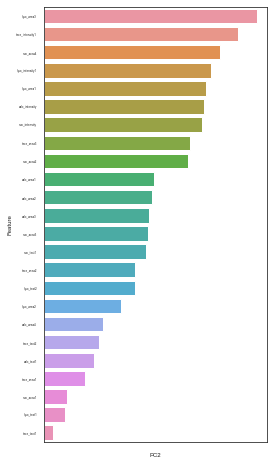

<ipython-input-73-6076199582f3>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)


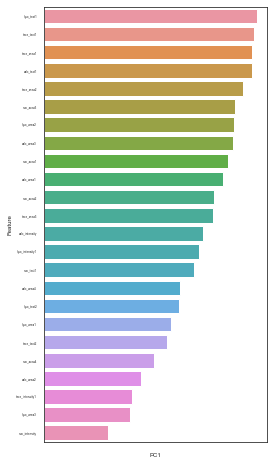

[0.55081446 0.24804221]


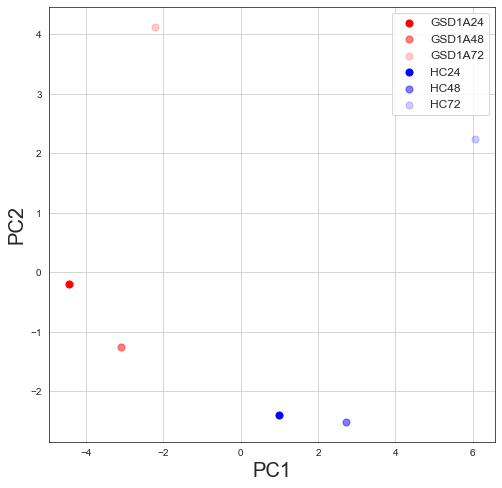

In [73]:
features = PCA_DATA_CLEAN.columns[4:]
x = PCA_DATA_CLEAN.loc[:, features].values
y = PCA_DATA_CLEAN.loc[:,['group_with_pc']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
PCA_DATA_COMP = pd.DataFrame(data = principalComponents
               , columns = ['principal component 1', 'principal component 2'])
importances = pd.DataFrame(data = abs(pca.components_).transpose(), columns = ['PC1', 'PC2'])
importances['Feature'] = features
display(importances.sort_values('PC1', ascending = False).reset_index(drop = True))
imp = importances.sort_values('PC2', ascending = False)[0:30]
ax1 = sns.barplot(x = 'PC2', y = 'Feature', data = imp)
  
fig = ax1.get_figure()
fig.set_size_inches(4, 8)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90) 
plt.savefig(path + '\\' + 'pca1importancefeat1.pdf', dpi=600 )
plt.show()
imp2 = importances.sort_values('PC1', ascending = False)[0:30]
ax2 = sns.barplot(x = 'PC1', y = 'Feature', data = imp2)
fig = ax2.get_figure()
fig.set_size_inches(4, 8)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.savefig(path + '\\' + 'pca1importancefeat2.pdf', dpi=600 )
plt.show()

PCA_DATA_FINAL = pd.concat([PCA_DATA_COMP, PCA_DATA_CLEAN['group_with_pc']], axis = 1)
PCA_FIG = plt.figure(figsize = (8,8))
ax1 = PCA_FIG.add_subplot(1,1,1) 
ax1.set_xlabel('PC1', fontsize = 20, fontname="Arial")
ax1.set_ylabel('PC2', fontsize = 20, fontname="Arial")
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")

types = PCA_DATA_FINAL["group_with_pc"].unique()
targets1 = [index for index in types]
reds = list( Color("red").range_to(Color("white"),6))
greens = list( Color("green").range_to(Color("white"),6))
blues = list( Color("blue").range_to(Color("white"),6))

for target in targets1:
    if 'HC' == target[:2]:
        color = blues[0] 
    elif 'GSD1A' in target:
        color = reds[0] 
    else:
        color = greens[0]
    ## get saturation according time...
    if '24' in target:
        alpha = 1
    elif '48' in target:
        alpha = 0.5    
    else:
        alpha = 0.2
        
    

    indicesToKeep = PCA_DATA_FINAL['group_with_pc'] == target
    ax1.scatter(PCA_DATA_FINAL.loc[indicesToKeep, 'principal component 1']
            , PCA_DATA_FINAL.loc[indicesToKeep, 'principal component 2']
            , c = mpl.colors.to_hex(str(color)),alpha=alpha
            , s = 50)
scale = 6    
ax1.legend(targets1*scale,fontsize=12)
ax1.grid()



print(pca.explained_variance_ratio_)
plt.savefig(path + '\\' + 'pca3.pdf', dpi=600 )
plt.show()

In [27]:
#LDA

,PC1,PC2,Feature
0,0.971352,0.340219,calc_intensity
1,0.662930,0.504822,nuc_area1
2,0.596927,0.067672,lyso_area1
3,0.566804,0.434045,lyso_intensity1
4,0.528893,0.650286,nuc_text1
5,0.492442,1.036858,nuc_intensity
6,0.458912,0.016299,tmre_text2
7,0.448585,0.285615,tmre_area2
8,0.423823,0.210419,lyso_area3
9,0.413137,0.097538,calc_area1


<ipython-input-69-2d25a221e713>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)


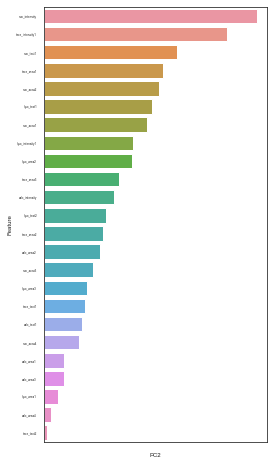

<ipython-input-69-2d25a221e713>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)


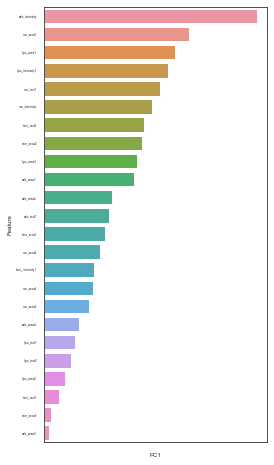

[0.92690622 0.07309378]


<Figure size 432x288 with 0 Axes>

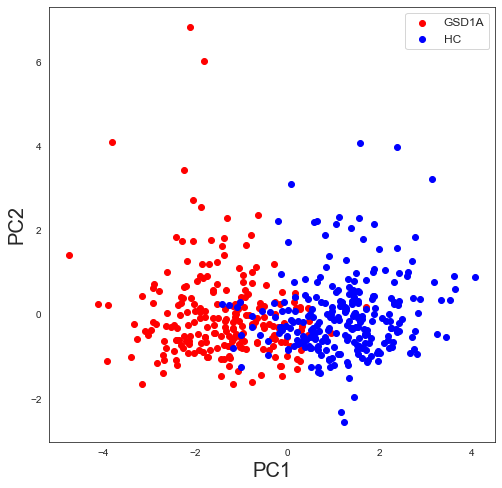

In [69]:
x = PCA_DATA_CLEAN.loc[:, features].values
y = PCA_DATA_CLEAN.loc[:,['group']].values
y = np.array([int('HC' == y_i[0][:2]) for y_i in y])

y[0]=2
x = StandardScaler().fit_transform(x)

lda = LDA(n_components=2)
lda_x = np.array(lda.fit(x, y).transform(x))


importances = pd.DataFrame(data = abs(lda.scalings_), columns = ['PC1', 'PC2'])
importances['Feature'] = features
display(importances.sort_values('PC1', ascending = False).reset_index(drop = True))
imp = importances.sort_values('PC2', ascending = False)[0:30]
ax1 = sns.barplot(x = 'PC2', y = 'Feature', data = imp)
    # Put the legend out of the figure
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax1.get_figure()
fig.set_size_inches(4, 8)
plt.rc('ytick', labelsize=3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)  
plt.savefig(path + '\\' + 'LDA1importancefeat1.pdf', dpi=600)
plt.show()
imp2 = importances.sort_values('PC1', ascending = False)[0:30]
ax2 = sns.barplot(x = 'PC1', y = 'Feature', data = imp2)
fig = ax2.get_figure()
fig.set_size_inches(4, 8)
plt.rc('ytick', labelsize=3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90) 
plt.savefig(path + '\\' + 'LDA1importancefeat2.pdf', dpi=600)
plt.show()

font = {'family' : 'Arial',
        'size'   : 22}

plt.rc('font', **font)


target_names= ['GSD1A', 'HC']
plt.figure()
plt.figure(figsize = (8,8))
for c, i, target_name in zip("rb", [0, 1], target_names):
    plt.scatter(lda_x[y == i,0] , lda_x[y == i,1] , c=c, label=target_name)
    plt.legend(target_names*scale,fontsize=12)
#     plt.title('LDA of dataset')
    plt.xlabel('LD1', fontsize = 20, family = 'Arial')
    plt.ylabel('LD2', fontsize = 20, family = 'Arial')
    plt.yticks(family = 'Arial', size = 10)
    plt.xticks(family = 'Arial', size= 10)
  
  ##loadings1 = ["calc_area1", "nuc_area1", "lyso_area1", "lyso_intensity1", "tmre_intensity1", "tmre_area1"]
# scale = 3
# for i, feature in enumerate(importances['Feature']):
#     if feature in loadings1:
#             plt.plot([0, importances['PC1'][i]*scale],[0, importances['PC2'][i]*scale])
#             plt.text( importances['PC1'][i]*scale, importances['PC2'][i]*scale, feature,fontsize=12,color = 'k')  
print(lda.explained_variance_ratio_)            
plt.savefig(path + '\\' + 'LDA.pdf', dpi=600 )
plt.show()